In [2]:
from astropy.io import fits
import numpy as np
import collections, numpy
import scipy.stats as st
import matplotlib.pyplot as plt
from math import *
from numpy import *
import time
from decimal import *
from matplotlib.gridspec import GridSpec
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from matplotlib.ticker import ScalarFormatter
from datetime import date
import matplotlib.patches as patches
from scipy.odr import *
from scipy.optimize import curve_fit
from scipy.special import wofz
import pylab
from scipy.odr import ODR, Model, Data, RealData
import matplotlib.collections as mcoll
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes
from mpl_toolkits.axes_grid1.inset_locator import mark_inset
from astropy.stats import *
import scipy.optimize as op
plt.style.use('seaborn-paper')
%matplotlib notebook

# A function to query CSC2.0 for a given obsID
import requests
from io import BytesIO
from astropy.io import votable
from astropy.coordinates import SkyCoord
from astropy.table import Table
from astropy import wcs
from astropy.io import fits
from scipy.integrate import simps
from astropy.stats import poisson_conf_interval

In [3]:
def extraer_BAT(filename):
#GRBname	Trig_ID	T90	T90_err	z	Epeak	Epeak_low	Epeak_hi	EpeakC	EpeakC_low	EpeakC_hi
    datos = loadtxt(filename, str)
    GRBname=[]
    Trig_ID=[]
    T90=[]
    T90_err=[]
    Epeak=[]
    Epeak_low=[]
    Epeak_hi=[]
    EpeakC=[]
    EpeakC_low=[]
    EpeakC_hi=[]
    z=[]
    print(len(datos))
    for i in range(0,len(datos)):
        GRBname.append(datos[i][0])
        Trig_ID.append(datos[i][1])
        T90.append(float(datos[i][2]))
        T90_err.append(float(datos[i][3]))
        z.append(float(datos[i][4]))
        Epeak.append(float(datos[i][5]))
        Epeak_low.append(float(datos[i][6]))
        Epeak_hi.append(float(datos[i][7]))
        EpeakC.append(float(datos[i][8]))
        EpeakC_low.append(float(datos[i][9]))
        EpeakC_hi.append(float(datos[i][10]))
#    name.append(str(datos[i]))
    return GRBname,T90,T90_err,z,EpeakC,EpeakC_low,EpeakC_hi,Epeak,Epeak_low,Epeak_hi

def extraer_Fermi(filename):
#GRBname	Trig_ID	T90	T90_err	z	Epeak	Epeak_low	Epeak_hi	EpeakC	EpeakC_low	EpeakC_hi
    datos = loadtxt(filename, str)
    GRBname=[]
    T90=[]
    T90_err=[]
    Fluence=[]
    Fluence_err=[]
    Epeak=[]
    Epeak_low_err=[]
    Epeak_hi_err=[]
    UTC=[]
    for i in range(0,len(datos)):
        if(float(datos[i][10])!=-99.0):
            GRBname.append(str(datos[i][0]))
            UTC.append(str(datos[i][1])+'T'+str(datos[i][2]))
            T90.append(float(datos[i][3]))
            T90_err.append(float(datos[i][4]))
            Fluence.append(float(datos[i][5]))
            Fluence_err.append(float(datos[i][6]))
            Epeak.append(float(datos[i][10]))
            Epeak_low_err.append(float(datos[i][11]))
            Epeak_hi_err.append(float(datos[i][12]))
#    name.append(str(datos[i]))
    return GRBname,T90,T90_err,Fluence,Fluence_err,Epeak,Epeak_low_err,Epeak_hi_err,UTC

In [4]:
import pandas as pd

#data = pd.read_csv('Swift_BAT_GRBs_data_redshift.txt',header=None)
#print(data)
#data.columns = ["GRBname","Trig_ID","T90","T90_err","z","Epeak","Epeak_low","Epeak_hi","EpeakC","EpeakC_low","EpeakC_hi"]

GRBname_BAT,T90_BAT,T90_err_BAT,z_BAT,EpeakC_BAT,EpeakC_low_BAT,EpeakC_hi_BAT,Epeak_BAT,Epeak_low_BAT,Epeak_hi_BAT=extraer_BAT('Swift_BAT_GRBs_data_redshift.txt')
GRBname_Fer,T90_Fer,T90_err_Fer,Fluence_Fer,Fluence_err_Fer,Epeak_Fer,Epeak_low_Fer,Epeak_hi_Fer,UTC_fermi=extraer_Fermi('fermi.txt')

440


In [22]:
#dfdat=pd.read_csv('GRB_Data_new.txt', sep=';')
#GRBname_BAT=dfdat['GRBname']
#UTC_BAT=dfdat['Trig_time_UTC']


#a=0
#for i in range(0,len(GRBname_BAT)):
##    print(GRBname_BAT[i][:9])
#    for j in range(0,len(GRBname_Fer)):
##        print(GRBname_Fer[j],GRBname_Fer[j][:9])
#        if(GRBname_BAT[i][:9]==GRBname_Fer[j][:9]):
#            a=a+1
#            print(GRBname_BAT[i],UTC_BAT[i],UTC_fermi[j])
#print('Number of matches',a)

In [23]:
#from datetime import datetime
#import pytz

#utc1 = datetime.strptime('2011-01-21 02:37:21', '%Y-%m-%d %H:%M:%S')
#utc2 = datetime.strptime('2018-06-20 15:50:37', '%Y-%m-%d %H:%M:%S')
#utc_res = datetime.strptime('15:50:37', '%H:%M:%S')
#print(utc2-utc1)
#print(utc_res)
#dif=utc2-utc1
#print(dif)

<IPython.core.display.Javascript object>


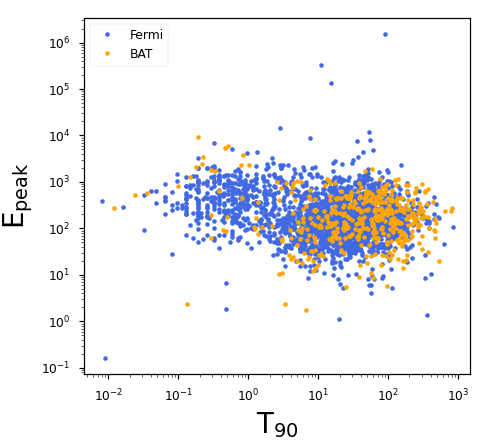

In [24]:
fig=plt.figure(figsize=(4.5, 4.0), dpi=100)
fig.patch.set_facecolor('white')

ax1 = fig.add_subplot(1, 1, 1)

ax1.plot(T90_Fer,Epeak_Fer,'o',markersize=3.0,color='royalblue',label='Fermi')
ax1.plot(T90_BAT,EpeakC_BAT,'o',markersize=3.0,color='orange',label='BAT')

plt.xscale('log')
plt.yscale('log')

ax1.set_ylabel('$\mathrm{E_{peak}}$',fontsize=18.)
ax1.set_xlabel('$\mathrm{T_{90}}$',fontsize=18.)

ax1.legend(loc=2)

plt.subplots_adjust(top=0.96, bottom=0.15, left=0.17, right=0.95, hspace=0.7,wspace=0.6)

<IPython.core.display.Javascript object>


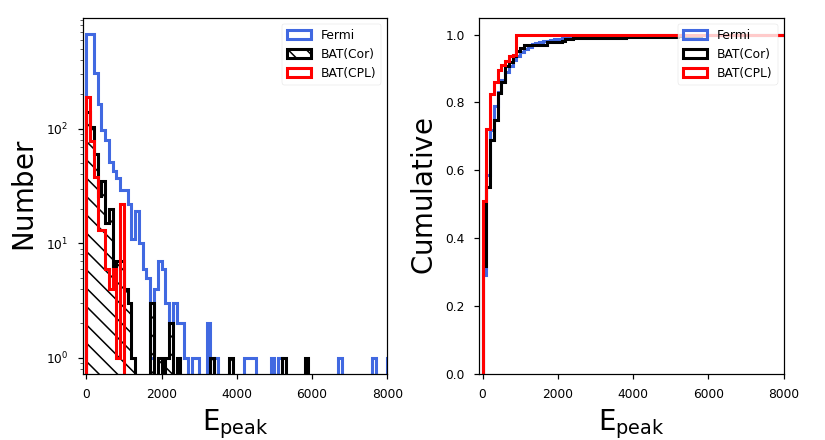

In [124]:
fig=plt.figure(figsize=(7.5, 4.0), dpi=100)
fig.patch.set_facecolor('white')

ax1 = fig.add_subplot(1, 2, 1)
Epeak_Fer=np.array(Epeak_Fer)
EpeakC_BAT=np.array(EpeakC_BAT)
Epeak_BAT=np.array(Epeak_BAT)
ax1.hist(Epeak_Fer[np.where(Epeak_Fer<30000.)[0]],bins=100,range=[0,10000],color='royalblue',
         density=False,linewidth=2.0,stacked=False, fill=False,histtype='step',label='Fermi')
ax1.hist(EpeakC_BAT[np.where(EpeakC_BAT<30000.)[0]],bins=100,range=[0,10000],density=False,
         linewidth=2.0,stacked=False, fill=False,color='k',hatch='\\\\',histtype='step',label='BAT(Cor)')
ax1.hist(Epeak_BAT[np.where(Epeak_BAT<30000.)[0]],bins=100,range=[0,10000],density=False,
         linewidth=2.0,stacked=False, fill=False,histtype='step',color='r',label='BAT(CPL)')

ax1.legend(loc=1)
ax1.set_xlim(-100,8000.)
plt.yscale('log')
ax1.set_xlabel('$\mathrm{E_{peak}}$',fontsize=18.)
ax1.set_ylabel('$\mathrm{Number}$',fontsize=18.)


######################

ax1 = fig.add_subplot(1, 2, 2)
Epeak_Fer=np.array(Epeak_Fer)
EpeakC_BAT=np.array(EpeakC_BAT)
Epeak_BAT=np.array(Epeak_BAT)
ax1.hist(Epeak_Fer[np.where(Epeak_Fer<30000.)[0]],bins=100,range=[0,10000],color='royalblue',
         density=True,cumulative=True,linewidth=2.0,stacked=False, fill=False,histtype='step',label='Fermi')
ax1.hist(EpeakC_BAT[np.where(EpeakC_BAT<30000.)[0]],bins=100,range=[0,10000],density=True,cumulative=True,
         linewidth=2.0,stacked=False, fill=False,color='k',histtype='step',label='BAT(Cor)')
ax1.hist(Epeak_BAT[np.where(Epeak_BAT<7000.)[0]],bins=100,range=[0,10000],density=True,cumulative=True,
         linewidth=2.0,stacked=False, fill=False,histtype='step',color='r',label='BAT(CPL)')

ax1.legend(loc=1)
ax1.set_xlim(-100,8000.)
ax1.set_xlabel('$\mathrm{E_{peak}}$',fontsize=18.)
ax1.set_ylabel('$\mathrm{Cumulative}$',fontsize=18.)



plt.subplots_adjust(top=0.96, bottom=0.15, left=0.1, right=0.95, hspace=0.2,wspace=0.3)

plt.savefig('Hist_cum_EP-peak.pdf',format='pdf',dpi=500) 

In [26]:
Fermi_dis=Epeak_Fer[np.where(Epeak_Fer<30000.)[0]]
BAT_dis=EpeakC_BAT[np.where(EpeakC_BAT<30000.)[0]]
BAT_CPL_dis=Epeak_BAT[np.where(Epeak_BAT<7000.)[0]]

from scipy.stats import ks_2samp

#perform Kolmogorov-Smirnov test; lee como funciona el K-S test y añadelo en tu tesis
print(ks_2samp(Fermi_dis,BAT_dis))
print(ks_2samp(Fermi_dis,BAT_CPL_dis))


KstestResult(statistic=0.06411140897264055, pvalue=0.09127380304859722)
KstestResult(statistic=0.22954182573060317, pvalue=4.884981308350689e-15)


El Kolmogorov-Smirnov test lo que hace es comparar dos distribuciones de datos, en este caso la distribución de $E_p$ de Fermi y la del BAT corregida por la relación lineal del photon index y el $E_p$. Así que hice el K-S test y te da como resultados statistic=0.06 y $p_{value}$=0.09. Como p_value>0.05, entonces no descartas la hipótesis nula (i.e., $H_0$: ambos conjuntos de datos provinene de la misma distribución). 

Por otro lado, cuando comparas la distribución de $E_p$ de Fermi y la del BAT a partir del model CPL, obtenemos statistic=0.23 y $p_{value}$=4.88e-15. Esto quiere decir que rechazamos la hipótesis nula cuando $p_{value}$<<0.05 (i.e., $H_0$: ambos conjuntos de datos provinene de la misma distribución). Por lo tanto, los dos conjuntos de datos NO provienen de la misma distribución.

Por lo tanto, podemos concluir que la relación lineal entre el photon index y l $E_p$ nos da valores similares a los detectados por Fermi.

In [37]:
def extraer(filename):
#	GRBname	TrigID	T90	Eiso	Eisolow	Eisohi	Ep	Eplow	Ephi	z
    datos = loadtxt(filename, str)
    z=[]
    T90=[]
    E_iso=[]
    E_iso_low=[]
    E_iso_hi=[]
    E_peak=[]
    E_peak_low=[]
    E_peak_hi=[]
    for i in range(0,len(datos)):
        T90.append(float(datos[i][3]))
        z.append(float(datos[i][-1]))
        E_peak.append(float(datos[i][7]))
        E_peak_low.append(float(datos[i][8]))
        E_peak_hi.append(float(datos[i][9]))
        E_iso.append(float(datos[i][4]))
        E_iso_low.append(float(datos[i][5]))
        E_iso_hi.append(float(datos[i][6]))
#    name.append(str(datos[i]))
    return T90,E_iso,E_iso_low,E_iso_hi,E_peak,E_peak_low,E_peak_hi,z

In [38]:
LT90,LE_iso,LE_iso_low,LE_iso_hi,LE_peak,LE_peak_low,LE_peak_hi,Lz=extraer('LGRBs_sample.txt')
ST90,SE_iso,SE_iso_low,SE_iso_hi,SE_peak,SE_peak_low,SE_peak_hi,Sz=extraer('SGRBs_sample.txt')

<IPython.core.display.Javascript object>


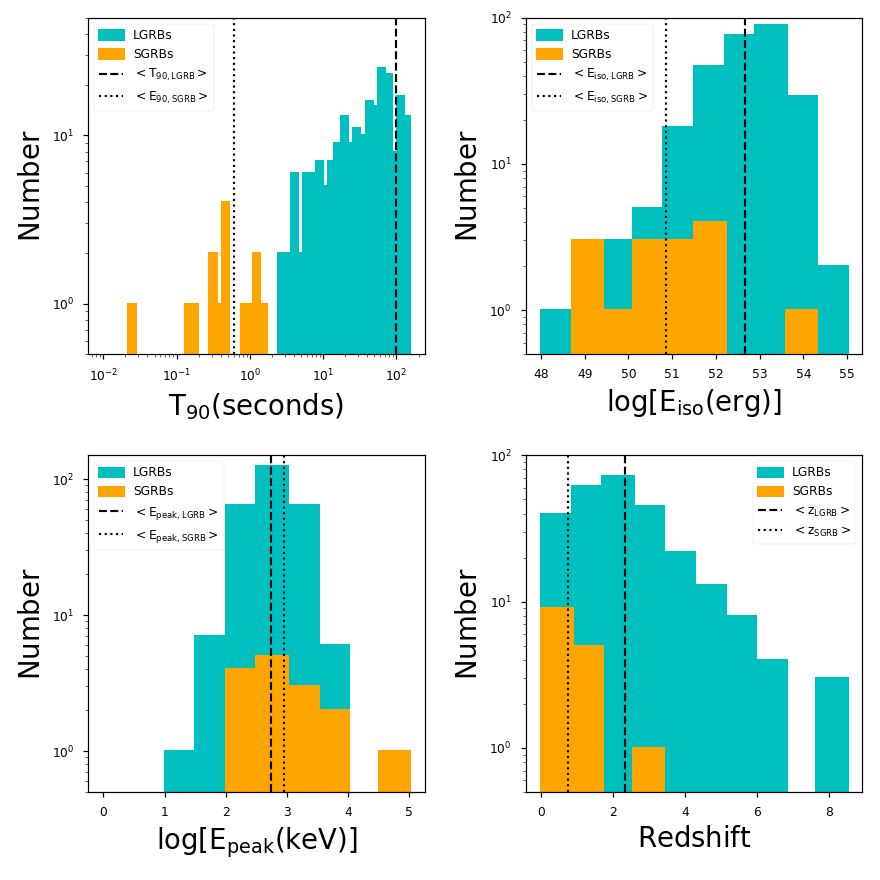

In [123]:
fig=plt.figure(figsize=(8.0, 8.0), dpi=100)
fig.patch.set_facecolor('white')

ax1 = fig.add_subplot(2, 2, 1)

ax1.hist(LT90,bins=np.logspace(np.log10(0.01),np.log10(150.0), 50),color='c',density=False,cumulative=False,linewidth=2.0,stacked=False, fill=True,histtype='step',label='LGRBs')
ax1.hist(ST90,bins=np.logspace(np.log10(0.01),np.log10(150.0), 50),color='orange',density=False,cumulative=False,linewidth=2.0,stacked=False, fill=True,histtype='step',label='SGRBs')
ax1.axvline(x=np.mean(LT90),color='k',linestyle='dashed',label='$\mathrm{<T_{90,LGRB}>}$')
ax1.axvline(x=np.mean(ST90),color='k',linestyle='dotted',label='$\mathrm{<E_{90,SGRB}>}$')

ax1.legend(loc=2)
ax1.set_xlabel('$\mathrm{T_{90}(seconds)}$',fontsize=18.)
ax1.set_ylabel('$\mathrm{Number}$',fontsize=18.)
ax1.set_ylim(0.5,50)
plt.yscale('log')
plt.xscale('log')


#####################################

ax1 = fig.add_subplot(2, 2, 2)

ax1.hist(LE_iso,bins=10,range=[48,55],color='c',density=False,cumulative=False,linewidth=2.0,stacked=False, fill=True,histtype='step',label='LGRBs')
ax1.hist(SE_iso,bins=10,range=[48,55],color='orange',density=False,cumulative=False,linewidth=2.0,stacked=False, fill=True,histtype='step',label='SGRBs')
ax1.axvline(x=np.mean(LE_iso),color='k',linestyle='dashed',label='$\mathrm{<E_{iso,LGRB}>}$')
ax1.axvline(x=np.mean(SE_iso),color='k',linestyle='dotted',label='$\mathrm{<E_{iso,SGRB}>}$')

ax1.legend(loc=2)
ax1.set_xlabel('$\mathrm{\log[E_{iso}(erg)]}$',fontsize=18.)
ax1.set_ylabel('$\mathrm{Number}$',fontsize=18.)
ax1.set_ylim(0.5,100)
plt.yscale('log')

#####################################

ax1 = fig.add_subplot(2, 2, 3)

ax1.hist(LE_peak,bins=10,range=[0,5],color='c',density=False,cumulative=False,linewidth=2.0,stacked=False, fill=True,histtype='step',label='LGRBs')
ax1.hist(SE_peak,bins=10,range=[0,5],color='orange',density=False,cumulative=False,linewidth=2.0,stacked=False, fill=True,histtype='step',label='SGRBs')
ax1.axvline(x=np.mean(LE_peak),color='k',linestyle='dashed',label='$\mathrm{<E_{peak,LGRB}>}$')
ax1.axvline(x=np.mean(SE_peak),color='k',linestyle='dotted',label='$\mathrm{<E_{peak,SGRB}>}$')

ax1.legend(loc=2)
ax1.set_xlabel('$\mathrm{\log[E_{peak}(keV)]}$',fontsize=18.)
ax1.set_ylabel('$\mathrm{Number}$',fontsize=18.)
ax1.set_ylim(0.5,150)
plt.yscale('log')


#####################################

ax1 = fig.add_subplot(2, 2, 4)

ax1.hist(Lz,bins=10,range=[0,8.5],color='c',density=False,cumulative=False,linewidth=2.0,stacked=False, fill=True,histtype='step',label='LGRBs')
ax1.hist(Sz,bins=10,range=[0,8.5],color='orange',density=False,cumulative=False,linewidth=2.0,stacked=False, fill=True,histtype='step',label='SGRBs')
ax1.axvline(x=np.mean(Lz),color='k',linestyle='dashed',label='$\mathrm{<z_{LGRB}>}$')
ax1.axvline(x=np.mean(Sz),color='k',linestyle='dotted',label='$\mathrm{<z_{SGRB}>}$')

ax1.legend(loc=1)
ax1.set_xlabel('$\mathrm{Redshift}$',fontsize=18.)
ax1.set_ylabel('$\mathrm{Number}$',fontsize=18.)
ax1.set_ylim(0.5,100)
plt.yscale('log')


plt.subplots_adjust(top=0.98, bottom=0.1, left=0.1, right=0.98, hspace=0.3,wspace=0.3)